In [ ]:
import pytesseract
from pytesseract import Output
import cv2
import matplotlib.pyplot as plt
import imutils
import numpy as np
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [ ]:
def show_img(img, name="Image"):
    fig = plt.gcf()
    fig.set_size_inches(20, 10)
    plt.axis("off")
    plt.title(name)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

def find_contours(img):
    contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Sort by area descending
    contours = sorted(contours, key=cv2.contourArea, reverse=True)
    return contours

def sort_points(pts):
    pts = pts.reshape((4, 2))
    rect = np.zeros((4, 2), dtype="float32")
    s = pts.sum(axis=1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]
    diff = np.diff(pts, axis=1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]
    return rect

def perspective_transform(image_file):
    img = cv2.imread(image_file)
    original = img.copy()
    show_img(img, "Original")
    (H, W) = img.shape[:2]

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    show_img(gray, "Gray")
    edged = cv2.Canny(gray, 60, 160)
    show_img(edged, "Canny Edges")
    
    conts = find_contours(edged.copy())
    larger = None
    for c in conts:
        peri = cv2.arcLength(c, True)
        aprox = cv2.approxPolyDP(c, 0.02 * peri, True)
        if len(aprox) == 4:
            larger = aprox
            break
    if larger is None:
        print("No 4-point contour found.")
        return None

    img_contour = img.copy()
    cv2.drawContours(img_contour, [larger], -1, (120, 255, 0), 2)
    show_img(img_contour, "Detected Contour")

    points_larger = sort_points(larger)
    pts1 = np.float32(points_larger)
    pts2 = np.float32([[0, 0], [W, 0], [W, H], [0, H]])

    matrix = cv2.getPerspectiveTransform(pts1, pts2)
    transform = cv2.warpPerspective(original, matrix, (W, H))

    show_img(transform, "Perspective Transform")
    return transform

def advanced_process_img(img):
    processed_img = cv2.resize(img, None, fx=1.6, fy=1.6, interpolation=cv2.INTER_CUBIC)
    show_img(processed_img, "Resized")

    processed_img = cv2.cvtColor(processed_img, cv2.COLOR_BGR2GRAY)
    show_img(processed_img, "Grayscale for Processing")

    processed_img = cv2.adaptiveThreshold(
        processed_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 9
    )
    show_img(processed_img, "Adaptive Threshold")

    kernel = np.ones((2,2), np.uint8)
    processed_img = cv2.morphologyEx(processed_img, cv2.MORPH_OPEN, kernel)
    show_img(processed_img, "Morphology Open (Noise Removal)")

    return processed_img

# Usage
img = perspective_transform('Images/181195.jpg')
if img is not None:
    final_img = advanced_process_img(img)

In [9]:
#config = r'--psm 6 --oem 1 --dpi 300 -c tessedit_char_whitelist=0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz./-'
config = r'--psm 6'
text = pytesseract.image_to_string(final_img, config=config)
print(text)

| ‘at ob ogst.2020 | ossizee | |S
sme AST ptt 2020 | oatnzm8 yd)
B1 fay | oari200 | canizoe |
8 a 03.14.2020 | 03.11.2028
ICE fey eet —
1 Surane pO ESB seers | sree
* pacer tia DE ue eee —
1 Reteatonein cate fern Department of Motor Traffic - Sri Lanka “Gow



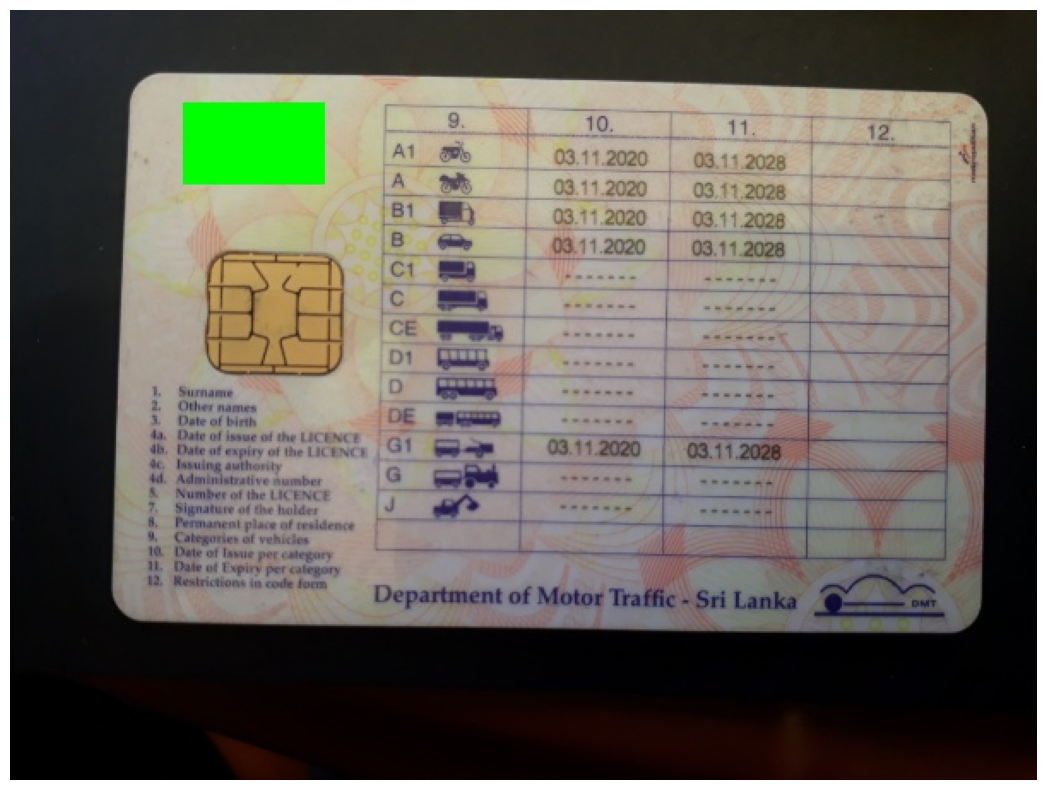

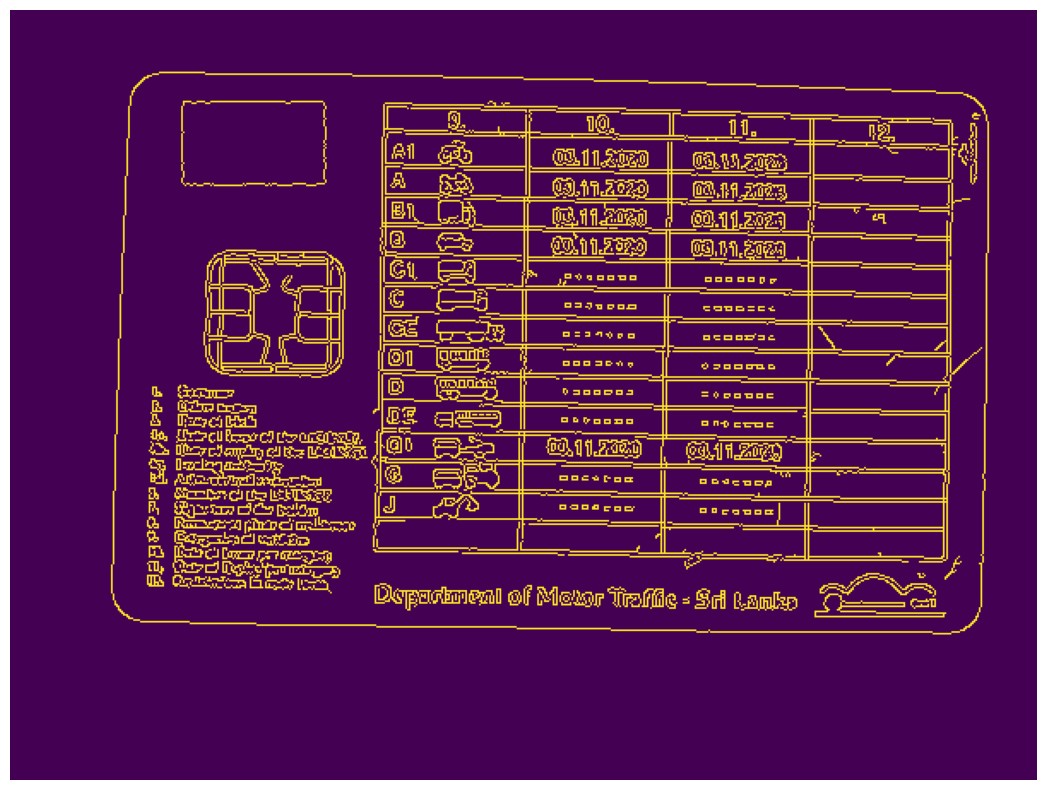

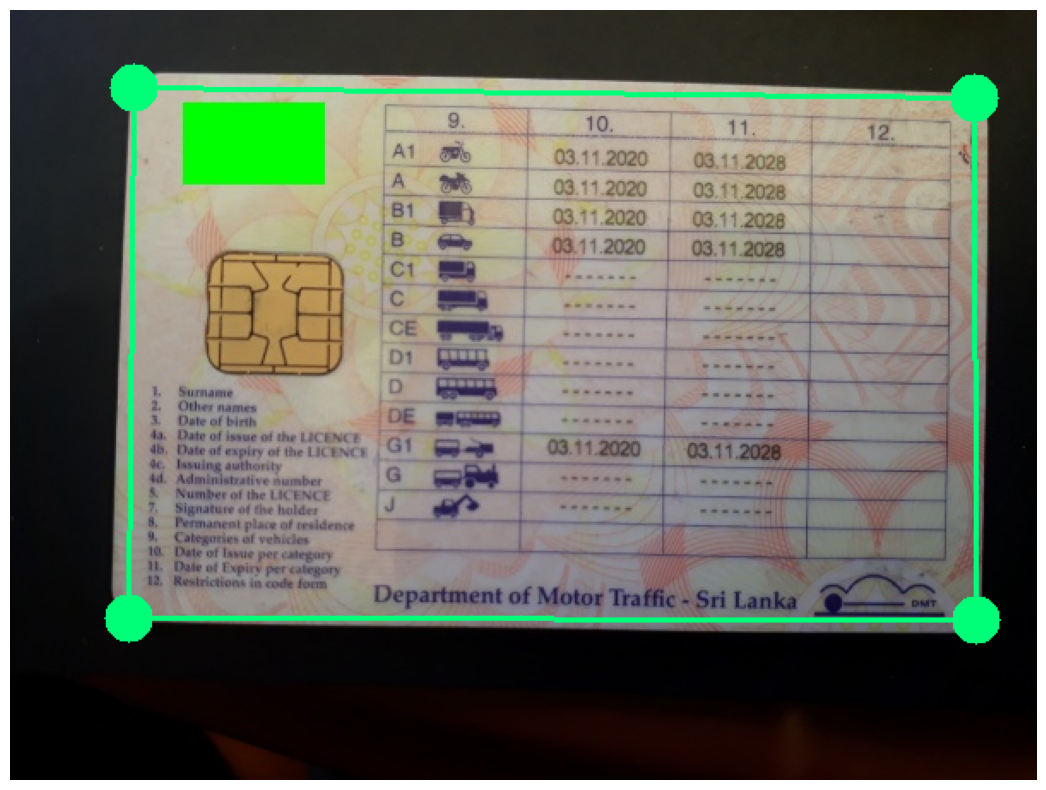

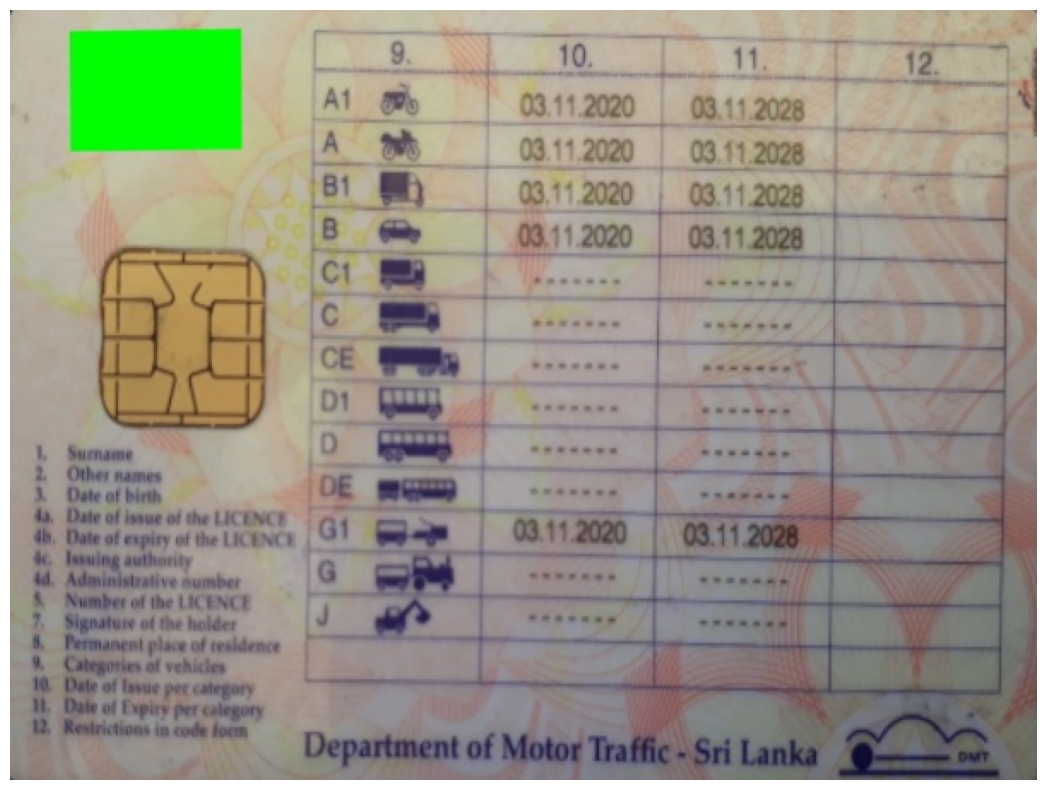

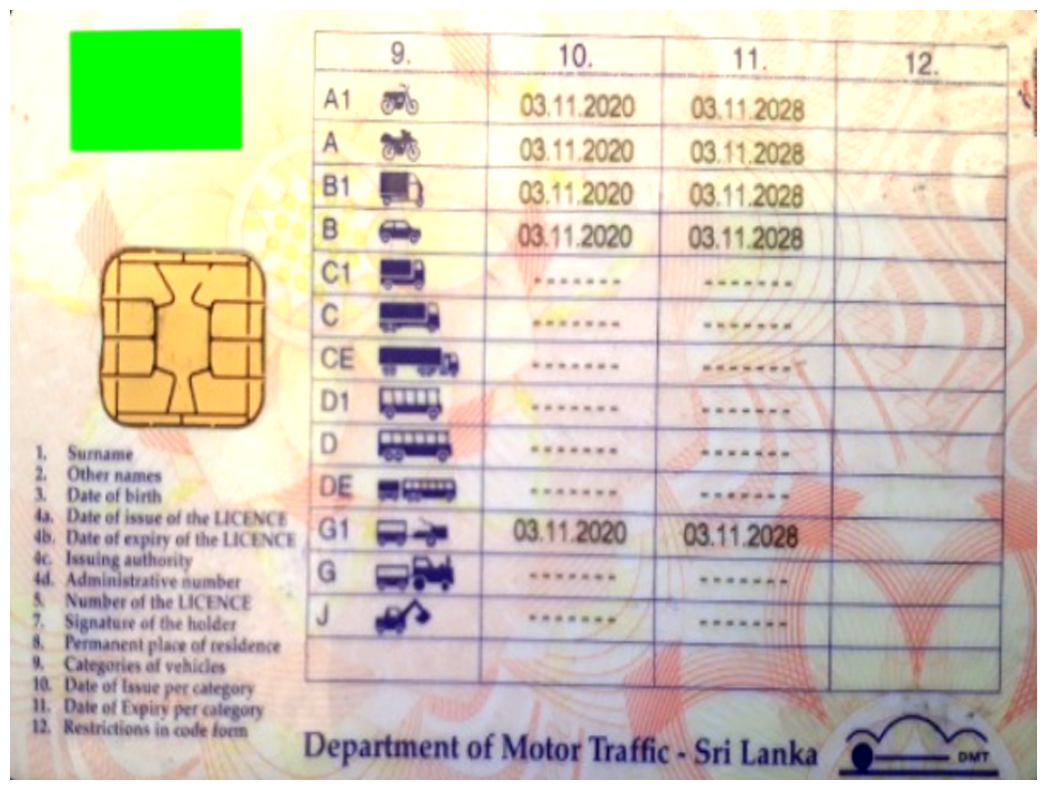

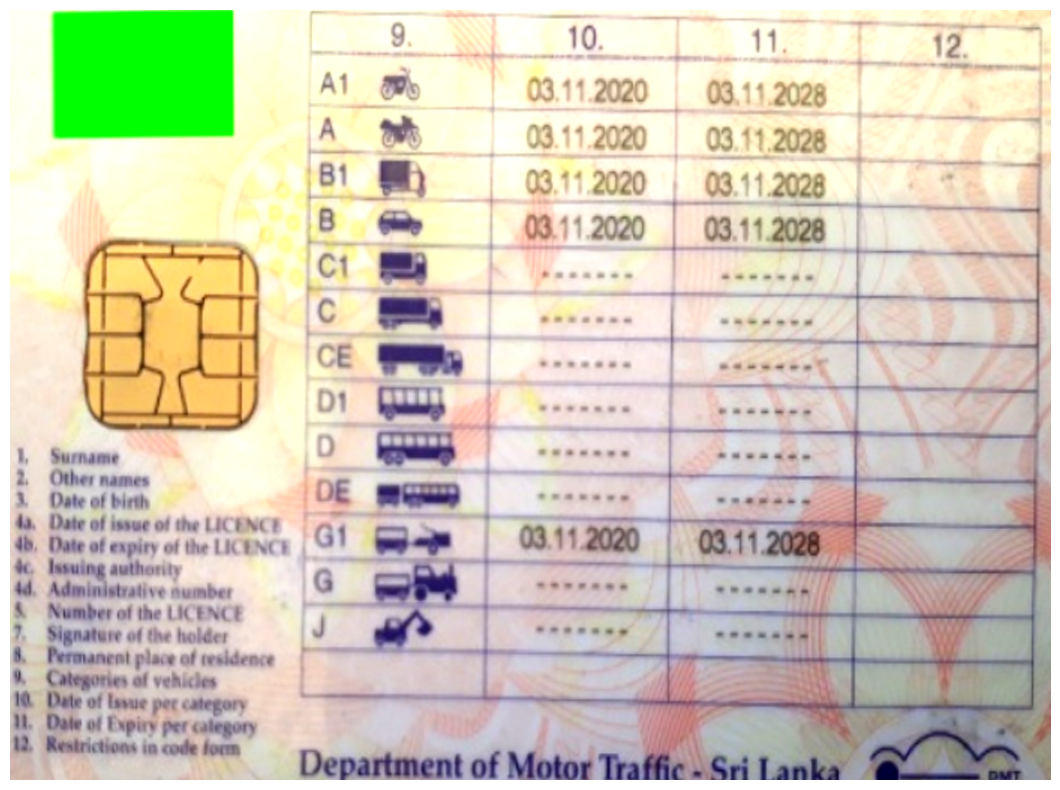

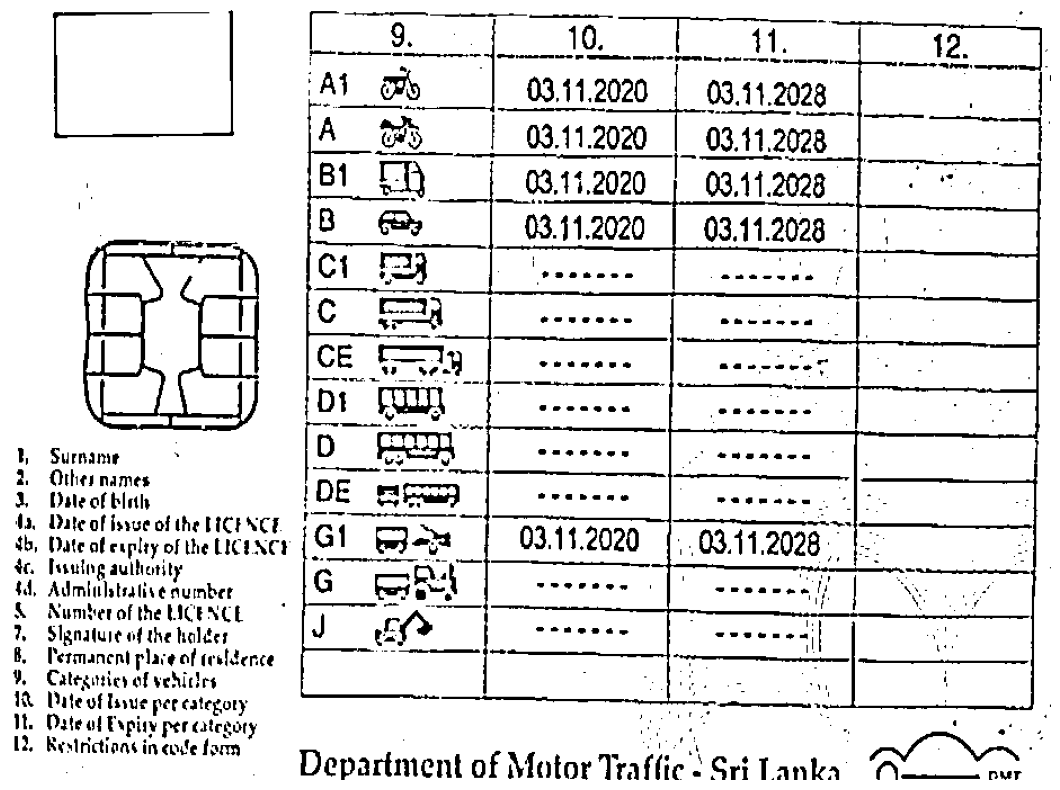

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_img(img, cmap=None):
    fig = plt.gcf()
    fig.set_size_inches(20, 10)
    plt.axis("off")
    if len(img.shape) == 2 or cmap is not None:
        plt.imshow(img, cmap=cmap)
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

def find_contours(img):
    conts = cv2.findContours(img, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    import imutils
    conts = imutils.grab_contours(conts)
    conts = sorted(conts, key=cv2.contourArea, reverse=True)[:6]
    return conts

def sort_points(points):
    points = points.reshape((4, 2))
    new_points = np.zeros((4, 1, 2), dtype=np.int32)
    add = points.sum(1)
    new_points[0] = points[np.argmin(add)]
    new_points[2] = points[np.argmax(add)]
    dif = np.diff(points, axis=1)
    new_points[1] = points[np.argmin(dif)]
    new_points[3] = points[np.argmax(dif)]
    return new_points

def transform_image(image_file):
    img = cv2.imread(image_file)
    original = img.copy()
    show_img(img)
    (H, W) = img.shape[:2]

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edged = cv2.Canny(gray, 60, 160)
    show_img(edged)

    conts = find_contours(edged.copy())
    larger = None
    for c in conts:
        peri = cv2.arcLength(c, True)
        aprox = cv2.approxPolyDP(c, 0.02 * peri, True)
        if len(aprox) == 4:
            larger = aprox
            break

    if larger is None:
        raise ValueError("No quadrilateral found in image.")

    cv2.drawContours(img, larger, -1, (120, 255, 0), 28)
    cv2.drawContours(img, [larger], -1, (120, 255, 0), 2)
    show_img(img)

    points_larger = sort_points(larger)
    pts1 = np.float32(points_larger)
    pts2 = np.float32([[0, 0], [W, 0], [W, H], [0, H]])

    matrix = cv2.getPerspectiveTransform(pts1, pts2)
    transform = cv2.warpPerspective(original, matrix, (W, H))

    show_img(transform)
    return transform

def process_img(img, brightness=50, contrast=80, margin=18):
    # Resize
    processed_img = cv2.resize(img, None, fx=1.6, fy=1.6, interpolation=cv2.INTER_CUBIC)
    H, W = processed_img.shape[:2]

    # Adjust brightness and contrast
    adjust = np.int16(processed_img)
    adjust = adjust * (contrast / 127 + 1) - contrast + brightness
    adjust = np.clip(adjust, 0, 255)
    adjust = np.uint8(adjust)
    show_img(adjust)

    # Crop margins
    img_edges = adjust[margin:H - margin, margin:W - margin]
    show_img(img_edges)

    # Grayscale and adaptive threshold
    gray = cv2.cvtColor(img_edges, cv2.COLOR_BGR2GRAY)
    thresh = cv2.adaptiveThreshold(
        gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 9
    )
    show_img(thresh, cmap='gray')
    return thresh

# Example usage:
img = transform_image('Images/181195.jpg')
processed = process_img(img)

In [13]:
#config = r'--psm 6 --oem 1 --dpi 300 -c tessedit_char_whitelist=0123456789ABCDEFGJabcdefgj.'
config = r'--psm 11 -c tessedit_char_whitelist=0123456789ABCDEFGJabcdefgj.'
text = pytesseract.image_to_string(processed, config=config)
print(text)

b

a

10

1b

eee

12.

Aj

08.14.2020

03.41.2028

fe

03.11.2020

03.11.2028

81

03.14.2020

03.11.2028

C

03. 11.2020

034 4.2028 .

eee

cc

aeeeee

CE

eeeeee

aeeeee

ae

e

aee

.

eae

aae

Dea

fe

eee

Dae0fba

1DE

eeeeabcea4

eeeaee

4a

DaeaffeageafeCECE

b

Daeafee.0feECECD

G1

abe

03.11.2028

a

4d.

Adbeaeabee

eagab

ff.

03.1 12028

7

eee

abefeCECE

gaefebade

ee.

eee

Caegcefebcee

eacaceafceefdece

1Daefaeeecaege

bDaefEgecaega

1Beecaaeadefac

Deaeafa ea fea bace f

